## Solar Irradiation - PDC

This kernel includes solar radiation prediction using 5 different regression models.
Also added a solar radiation level forecast.

# Import Data

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


data_path = "../input/"
df = pd.read_csv(data_path+"SolarPrediction.csv")
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [26]:
data=pd.read_csv('../input/SolarPrediction.csv')

<AxesSubplot: >

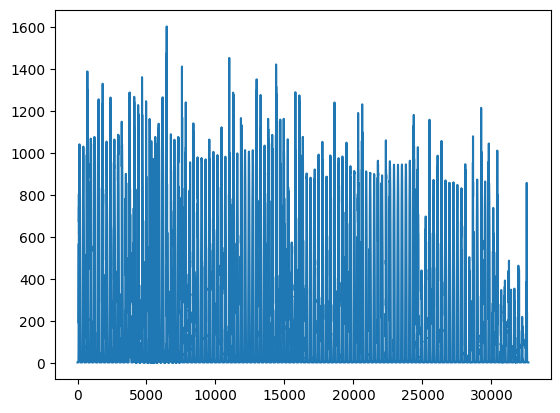

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
data['Radiation'].plot()

<AxesSubplot: >

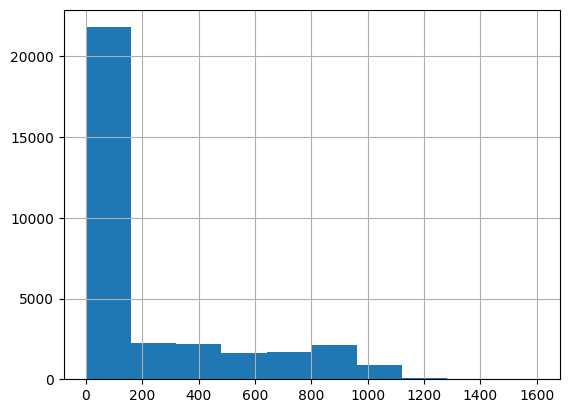

In [28]:
df['Radiation'].hist()

# Investigate Existing Correlations

C:\Users\Hariket Sheth\AppData\Local\Temp\ipykernel_21480\1873879989.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<AxesSubplot: >

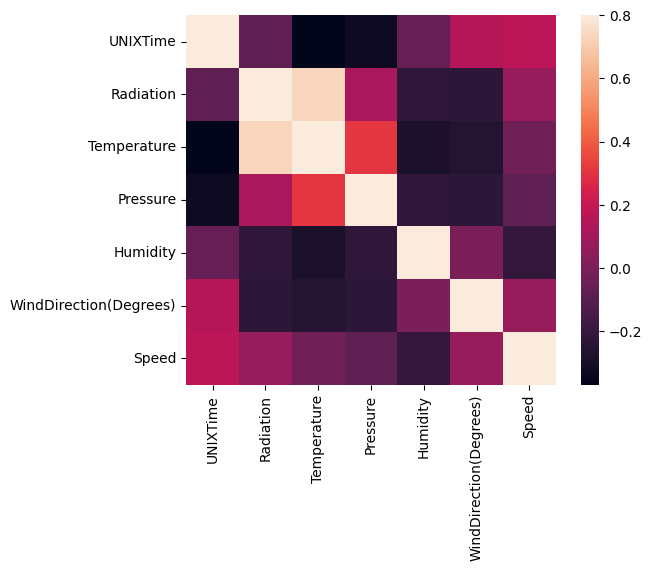

In [29]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

# Checking Relationship between Irradiance and Power

Text(0.5, 0.98, 'Temp vs. Radiation')

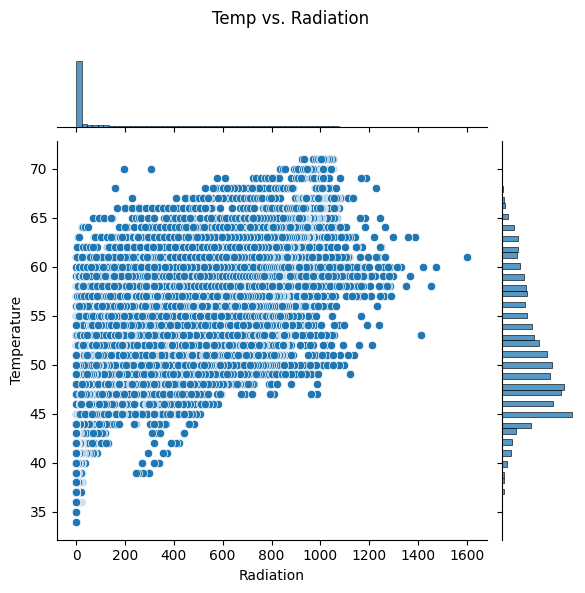

In [32]:
g = sns.jointplot(x="Radiation", y="Temperature", data=df)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp vs. Radiation')

Text(0.5, 0.98, 'Temp vs. Humidity')

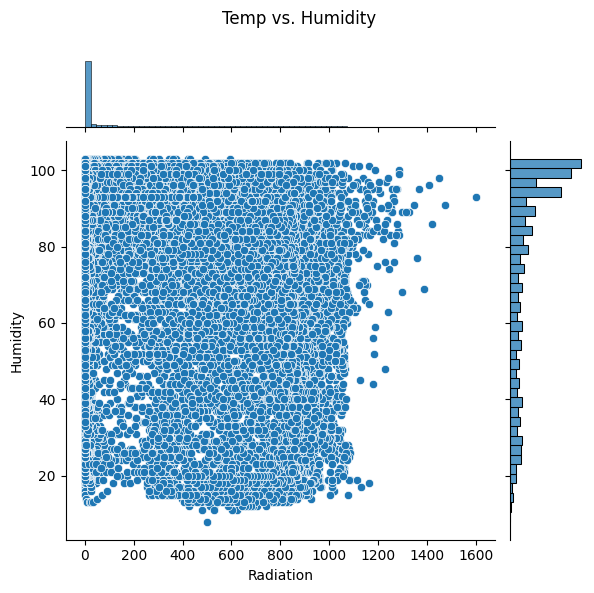

In [33]:
g = sns.jointplot(x="Radiation", y="Humidity", data=df)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp vs. Humidity')

In [34]:
#drop low radiation values
df = df[df['Radiation'] >= 10]

# Feature Engineering

In [39]:
#Covert time to_datetime
#Add column 'hour'
df['Time_conv'] =  pd.to_datetime(df['Time'], format='%H:%M:%S')
df['hour'] = pd.to_datetime(df['Time_conv'], format='%H:%M:%S').dt.hour

#Add column 'month'
df['month'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.month

#Add column 'year'
df['year'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.year

#Duration of Day
df['total_time'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S').dt.hour
df.head()

C:\Users\Hariket Sheth\AppData\Local\Temp\ipykernel_21480\4191432262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_conv'] =  pd.to_datetime(df['Time'], format='%H:%M:%S')
C:\Users\Hariket Sheth\AppData\Local\Temp\ipykernel_21480\4191432262.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = pd.to_datetime(df['Time_conv'], format='%H:%M:%S').dt.hour
C:\Users\Hariket Sheth\AppData\Local\Temp\ipykernel_21480\4191432262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a 

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Time_conv,hour,month,year,total_time
70,1475208322,9/29/2016 12:00:00 AM,18:05:22,10.96,54,30.44,59,154.16,4.50,06:13:00,18:13:00,1900-01-01 18:05:22,18,9,2016,12
71,1475208022,9/29/2016 12:00:00 AM,18:00:22,19.42,55,30.44,57,58.42,6.75,06:13:00,18:13:00,1900-01-01 18:00:22,18,9,2016,12
72,1475207722,9/29/2016 12:00:00 AM,17:55:22,27.14,55,30.44,53,47.86,4.50,06:13:00,18:13:00,1900-01-01 17:55:22,17,9,2016,12
73,1475207419,9/29/2016 12:00:00 AM,17:50:19,33.75,56,30.44,52,74.56,2.25,06:13:00,18:13:00,1900-01-01 17:50:19,17,9,2016,12
74,1475207122,9/29/2016 12:00:00 AM,17:45:22,49.57,56,30.44,49,25.72,6.75,06:13:00,18:13:00,1900-01-01 17:45:22,17,9,2016,12


# Data Visualization

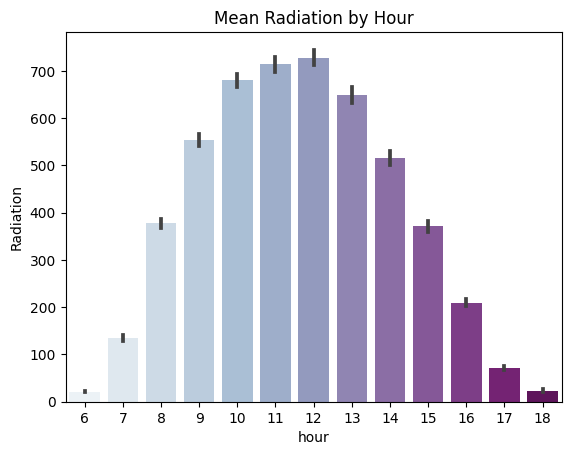

In [40]:
ax = plt.axes()
sns.barplot(x="hour", y='Radiation', data=df, palette="BuPu", ax = ax)
ax.set_title('Mean Radiation by Hour')
plt.show()

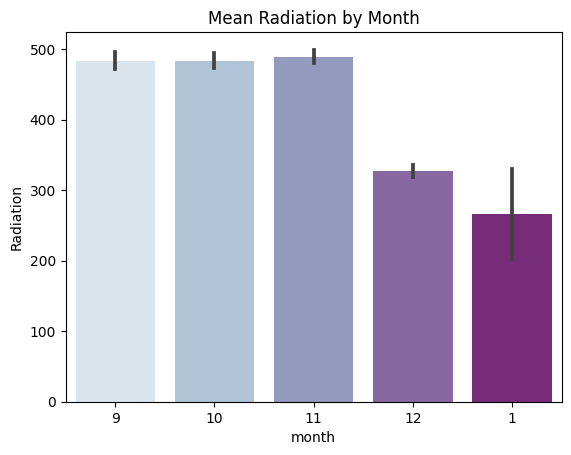

In [37]:
ax = plt.axes()
sns.barplot(x="month", y='Radiation', data=df, palette="BuPu", ax = ax, order=[9,10,11,12,1])
ax.set_title('Mean Radiation by Month')
plt.show()

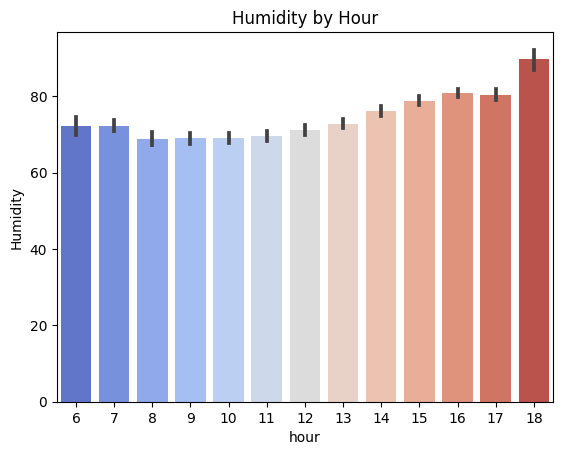

In [41]:
ax = plt.axes()
sns.barplot(x="hour", y='Humidity', data=df, palette=("coolwarm"), ax = ax)
ax.set_title('Humidity by Hour')
plt.show()

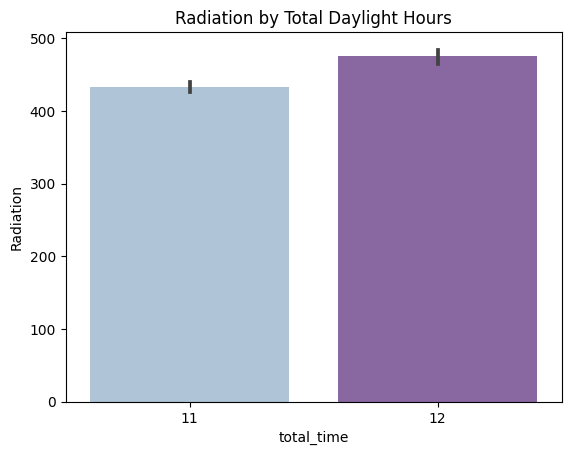

In [42]:
ax = plt.axes()
sns.barplot(x="total_time", y='Radiation', data=df, palette="BuPu", ax = ax)
ax.set_title('Radiation by Total Daylight Hours')
plt.show()

# Cluster Analysis

In [43]:
from sklearn.cluster import KMeans

In [44]:
df = pd.read_csv(data_path+"SolarPrediction.csv")
X1 = df[['Temperature' , 'Humidity']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

C:\Users\Hariket Sheth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1325: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


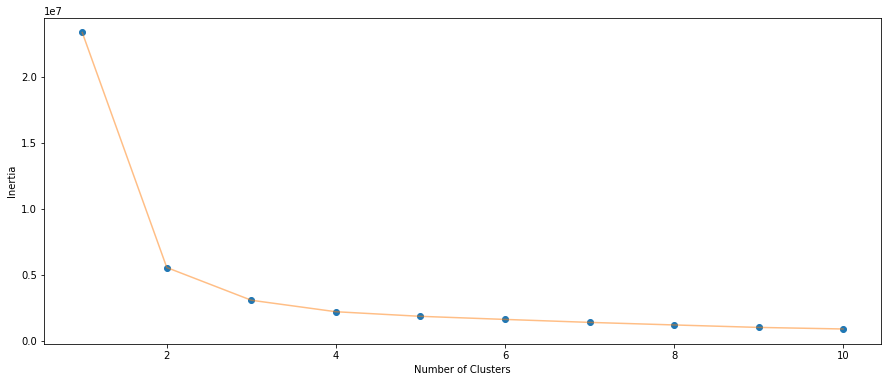

In [16]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [45]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

In [46]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

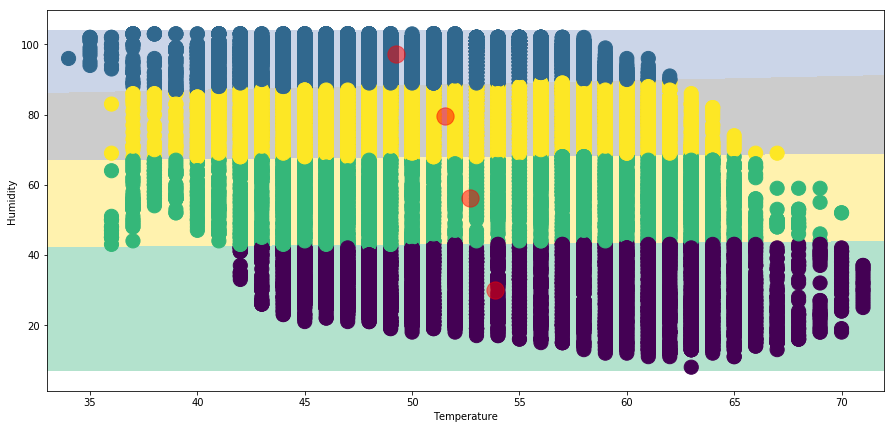

In [19]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Temperature' ,y = 'Humidity' , data = df , c = labels , 
            s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Humidity') , plt.xlabel('Temperature')
plt.show()

# Prediction

In [47]:
y = df['Radiation']
X = df.drop(['Radiation', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis=1)

In [48]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

**Using LinearRegression**

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [50]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 59.8607207  257.43435134 -25.19045042   4.2867423  -22.68999684
  23.31690607]


In [51]:
lpredictions = lm.predict( X_test)
print(lpredictions)

[ 18.84034029 -86.97936541 509.26991288 ...  11.7877642  185.3684998
   7.85973383]


Text(0, 0.5, 'Predicted Y')

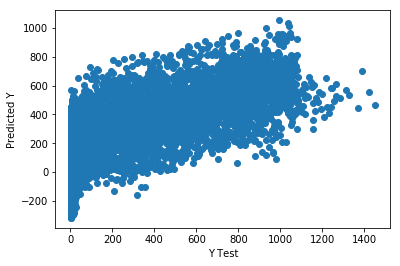

In [25]:
plt.scatter(y_test,lpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [52]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, lpredictions))
print('MSE:', metrics.mean_squared_error(y_test, lpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lpredictions)))

MAE: 151.14646111030342
MSE: 40542.25512135677
RMSE: 201.35107429898846


In [53]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
UNIXTime,59.860721
Temperature,257.434351
Pressure,-25.190450
Humidity,4.286742
WindDirection(Degrees),-22.689997
Speed,23.316906


**Using RidgeCV**

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=5)
ridge.fit(X_train,y_train)

RidgeCV(cv=5)

In [55]:
print('Coefficients: \n', ridge.coef_)

Coefficients: 
 [ 59.78102685 257.26638781 -25.16950159   4.23560976 -22.70720369
  23.30803546]


In [30]:
rpredictions = ridge.predict( X_test)
print(rpredictions)

[ 18.94546753 -86.89382414 509.06409314 ...  11.93754358 185.33961205
   8.07790337]


Text(0, 0.5, 'Predicted Y')

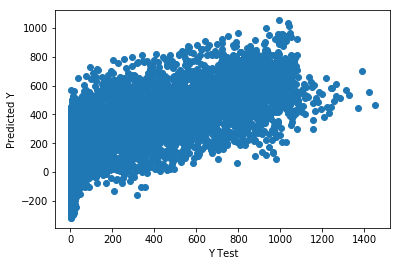

In [31]:
plt.scatter(y_test,rpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [32]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, rpredictions))
print('MSE:', metrics.mean_squared_error(y_test, rpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rpredictions)))

MAE: 151.1419831195534
MSE: 40543.64776443644
RMSE: 201.3545325152539


In [33]:
coeffecients = pd.DataFrame(ridge.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
UNIXTime,59.781027
Temperature,257.266388
Pressure,-25.169502
Humidity,4.235610
WindDirection(Degrees),-22.707204
Speed,23.308035


**Using SGDRegressor**

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn import linear_model
sgd = linear_model.SGDRegressor(max_iter=1000)
sgd.fit(X_train,y_train)

SGDRegressor()

In [35]:
print('Coefficients: \n', sgd.coef_)

Coefficients: 
 [ 57.58475528 257.72320541 -22.23955226   1.39056883 -15.7422634
  22.20879535]


In [36]:
spredictions = sgd.predict(X_test)
print(spredictions)

[  4.66935806 -94.81651169 504.35586125 ...  12.38151939 183.45752351
  12.68136777]


Text(0, 0.5, 'Predicted Y')

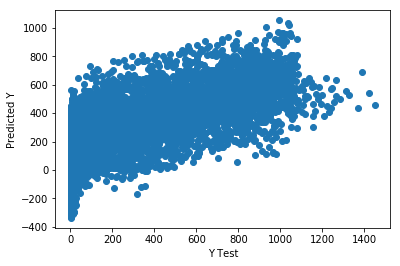

In [37]:
plt.scatter(y_test,spredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [38]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, spredictions))
print('MSE:', metrics.mean_squared_error(y_test, spredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, spredictions)))

MAE: 150.93155552461866
MSE: 40636.29102429816
RMSE: 201.58445134557914


In [39]:
coeffecients = pd.DataFrame(sgd.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
UNIXTime,57.584755
Temperature,257.723205
Pressure,-22.239552
Humidity,1.390569
WindDirection(Degrees),-15.742263
Speed,22.208795


> **Using AdaBoostRegressor**

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.ensemble import AdaBoostRegressor
abreg = AdaBoostRegressor(random_state=0, n_estimators=100)
abreg.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=0)

In [41]:
abpredictions = abreg.predict( X_test)
print(abpredictions)

[152.98179644  80.61417301 556.65651915 ...  35.55824304 212.46642753
  35.55824304]


Text(0, 0.5, 'Predicted Y')

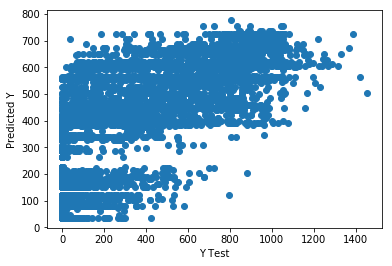

In [42]:
plt.scatter(y_test,abpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [43]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, abpredictions))
print('MSE:', metrics.mean_squared_error(y_test, abpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, abpredictions)))

MAE: 162.83133845782726
MSE: 43438.89045587802
RMSE: 208.4199857400389


**Using XGBoost**

In [44]:
final_data=data.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1)

In [45]:
final_y=final_data.pop('Radiation')

In [46]:
final_x=final_data

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.33, random_state=42)
import xgboost as xgb

In [48]:
xgdmat=xgb.DMatrix(X_train,y_train)
our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
final_gb=xgb.train(our_params,xgdmat)
tesdmat=xgb.DMatrix(X_test)
xpredictions=final_gb.predict(tesdmat)
print(xpredictions)

[14:31:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[385.27884  375.82608   17.700964 ...  48.563725  17.700964 487.74847 ]


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



Text(0, 0.5, 'Predicted Y')

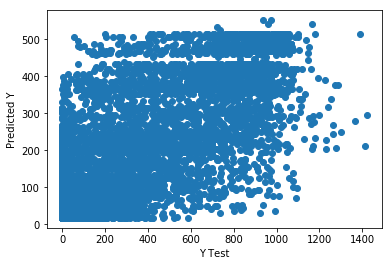

In [49]:
plt.scatter(y_test,xpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [50]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, xpredictions))
print('MSE:', metrics.mean_squared_error(y_test, xpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xpredictions)))

MAE: 140.17789373424526
MSE: 51326.31031015023
RMSE: 226.55310704148425


**Let`s check if there are any outliers in our dataset**

In [51]:
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
Outliers = (y < (Q1 - 1.5 * IQR)) |(y > (Q3 + 1.5 * IQR))


No outliers were found in the dataset which allows us to pick the most accurate model by comparing the mean absolute error values.

As we can see the XGBoost model seems to have the lowest rate of mean absolute error (MAE) which leads us to a conclusion that the XGBoost model is the most accurate in this kenrel.

# Forecast

Lets try and make a forecast about the solar radiation level in future.

In [52]:
from fbprophet import Prophet

In [53]:
df = pd.DataFrame(data)

In [54]:
date_rad = df[['Data', 'Radiation']] 

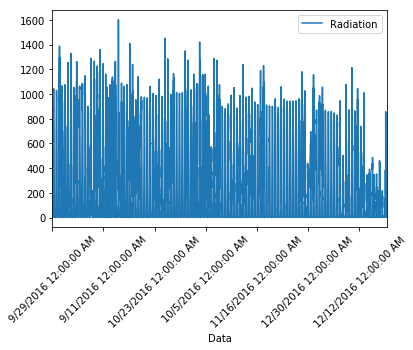

In [55]:
date_rad.plot(x='Data', y='Radiation', kind="line", rot=45)


In [56]:
date_rad = date_rad.rename(columns={'Data':'ds', 'Radiation':'y'})

In [57]:
p = Prophet()
p.fit(date_rad)

In [58]:
future = p.make_future_dataframe(periods=1825)
forecast = p.predict(future)

In [59]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
34506,2021-12-26,6605.089833,-93011.678187,113902.147281,-92936.186151,113379.325179,-4.430120,-4.430120,-4.430120,-4.430120,-4.430120,-4.430120,0.0,0.0,0.0,6600.659713
34507,2021-12-27,6608.607073,-93021.558948,113666.824900,-92992.233022,113516.550183,5.321125,5.321125,5.321125,5.321125,5.321125,5.321125,0.0,0.0,0.0,6613.928198
34508,2021-12-28,6612.124313,-92775.397989,113475.976017,-93048.233264,113653.775186,11.192950,11.192950,11.192950,11.192950,11.192950,11.192950,0.0,0.0,0.0,6623.317262
34509,2021-12-29,6615.641552,-93222.174131,113535.689656,-93103.365401,113791.005989,18.630431,18.630431,18.630431,18.630431,18.630431,18.630431,0.0,0.0,0.0,6634.271984
34510,2021-12-30,6619.158792,-93108.497621,113665.427950,-93158.287476,113928.462647,-0.448595,-0.448595,-0.448595,-0.448595,-0.448595,-0.448595,0.0,0.0,0.0,6618.710197


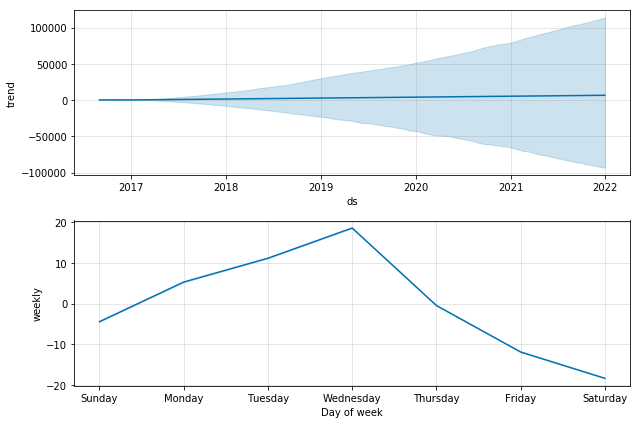

In [60]:
forecastplot = p.plot_components(forecast)